In [1]:
import numpy as np
import pandas as pd
import sqlite3
conn = sqlite3.connect("/tmp/nycflights13.db")
pd.set_option("display.notebook_repr_html", False)

In [2]:
weather = pd.read_csv("nycflights13_weather.csv.gz", comment = '#')
airports = pd.read_csv("nycflights13_airports.csv.gz", comment = '#')
flights = pd.read_csv("nycflights13_flights.csv.gz", comment = '#')
planes = pd.read_csv("nycflights13_planes.csv.gz", comment = '#')
airlines = pd.read_csv("nycflights13_airlines.csv.gz", comment = '#')
airports.to_sql("airports", conn)
weather.to_sql('weather', conn)
flights.to_sql('flights', conn)
planes.to_sql('planes', conn)
airlines.to_sql('airlines', conn)

ValueError: Table 'airports' already exists.

## Excercises
___
11. `SELECT manufacturer, COUNT(*) FROM planes WHERE seats > 200 GROUP BY manufacturer` - 
12. `SELECT manufacturer, COUNT(*) FROM planes GROUP BY manufacturer HAVING COUNT(*) > 10`
13. `SELECT manufacturer, COUNT(*) FROM planes WHERE seats > 200 GROUP BY manufacturer HAVING COUNT(*) > 10`
14. `SELECT manufacturer, COUNT(*) AS howmany FROM planes GROUP BY manufacturer ORDER BY howmany`
15. `SELECT manufacturer, COUNT(*) AS howmany FROM planes GROUP BY manufacturer ORDER BY howmany DESC LIMIT 10`
16. `SELECT * FROM planes WHERE year >= 2012 ORDER BY year ASC, seats DESC`
17. `SELECT * FROM planes WHERE year >= 2012 ORDER BY seats DESC, year ASC`
___

In [3]:
pd.read_sql_query("""SELECT manufacturer, COUNT(*) FROM planes WHERE seats > 200 GROUP BY manufacturer""", conn)

       manufacturer  COUNT(*)
0            AIRBUS        66
1  AIRBUS INDUSTRIE         4
2            BOEING       225

In [4]:
planes.groupby([planes.manufacturer[planes.seats > 200]]).size().rename('COUNT(*)').reset_index()

       manufacturer  COUNT(*)
0            AIRBUS        66
1  AIRBUS INDUSTRIE         4
2            BOEING       225

In [5]:
planes.loc[planes.seats > 200].groupby('manufacturer').size().rename('COUNT(*)').reset_index()

       manufacturer  COUNT(*)
0            AIRBUS        66
1  AIRBUS INDUSTRIE         4
2            BOEING       225

In [6]:
# SELECT manufacturer, COUNT(*) FROM planes GROUP BY manufacturer HAVING COUNT(*) > 10
pd.read_sql_query("""SELECT manufacturer, COUNT(*) FROM planes GROUP BY manufacturer HAVING COUNT(*) > 10""", conn)

                    manufacturer  COUNT(*)
0                         AIRBUS       336
1               AIRBUS INDUSTRIE       400
2                         BOEING      1630
3                 BOMBARDIER INC       368
4                        EMBRAER       299
5              MCDONNELL DOUGLAS       120
6  MCDONNELL DOUGLAS AIRCRAFT CO       103
7  MCDONNELL DOUGLAS CORPORATION        14

In [7]:
x = planes.groupby('manufacturer').size().rename('COUNT(*)')
x.loc[x > 10].reset_index()

                    manufacturer  COUNT(*)
0                         AIRBUS       336
1               AIRBUS INDUSTRIE       400
2                         BOEING      1630
3                 BOMBARDIER INC       368
4                        EMBRAER       299
5              MCDONNELL DOUGLAS       120
6  MCDONNELL DOUGLAS AIRCRAFT CO       103
7  MCDONNELL DOUGLAS CORPORATION        14

In [8]:
# SELECT manufacturer, COUNT(*) FROM planes WHERE seats > 200 GROUP BY manufacturer HAVING COUNT(*) > 10
pd.read_sql_query("""SELECT manufacturer, COUNT(*) FROM planes WHERE seats > 200 GROUP BY manufacturer HAVING COUNT(*) > 10""", conn)

  manufacturer  COUNT(*)
0       AIRBUS        66
1       BOEING       225

In [9]:
x = planes.loc[planes.seats > 200].groupby('manufacturer').size().rename('count')
x.loc[x>10].reset_index()

  manufacturer  count
0       AIRBUS     66
1       BOEING    225

In [10]:
# SELECT manufacturer, COUNT(*) AS howmany FROM planes GROUP BY manufacturer ORDER BY howmany
pd.read_sql_query(
"""SELECT manufacturer, COUNT(*) AS howmany FROM planes GROUP BY manufacturer ORDER BY howmany""", conn
)

                     manufacturer  howmany
0                      AGUSTA SPA        1
1              AVIAT AIRCRAFT INC        1
2          AVIONS MARCEL DASSAULT        1
3                   BARKER JACK L        1
4                    CANADAIR LTD        1
5              CIRRUS DESIGN CORP        1
6                     DEHAVILLAND        1
7                         DOUGLAS        1
8                  FRIEDEMANN JON        1
9              HURLEY JAMES LARRY        1
10                    JOHN G HESS        1
11                   KILDALL GARY        1
12                LAMBERT RICHARD        1
13                    LEARJET INC        1
14                LEBLANC GLENN T        1
15                     MARZ BARRY        1
16                    PAIR MIKE E        1
17         ROBINSON HELICOPTER CO        1
18                       SIKORSKY        1
19          AMERICAN AIRCRAFT INC        2
20                          BEECH        2
21                           BELL        2
22         

In [11]:
planes.groupby('manufacturer').size().rename("howmany").sort_values().reset_index()

                     manufacturer  howmany
0                      AGUSTA SPA        1
1                         DOUGLAS        1
2                     DEHAVILLAND        1
3              CIRRUS DESIGN CORP        1
4              HURLEY JAMES LARRY        1
5                    CANADAIR LTD        1
6                     JOHN G HESS        1
7                    KILDALL GARY        1
8                        SIKORSKY        1
9                 LAMBERT RICHARD        1
10                LEBLANC GLENN T        1
11                  BARKER JACK L        1
12         AVIONS MARCEL DASSAULT        1
13             AVIAT AIRCRAFT INC        1
14                     MARZ BARRY        1
15                    PAIR MIKE E        1
16         ROBINSON HELICOPTER CO        1
17                    LEARJET INC        1
18                 FRIEDEMANN JON        1
19                   STEWART MACO        2
20                           BELL        2
21                          BEECH        2
22         

In [12]:
# SELECT manufacturer, COUNT(*) AS howmany FROM planes GROUP BY manufacturer ORDER BY howmany DESC LIMIT 10
pd.read_sql_query(
"""SELECT manufacturer, COUNT(*) AS howmany FROM planes GROUP BY manufacturer ORDER BY howmany DESC LIMIT 10""", conn
)

                    manufacturer  howmany
0                         BOEING     1630
1               AIRBUS INDUSTRIE      400
2                 BOMBARDIER INC      368
3                         AIRBUS      336
4                        EMBRAER      299
5              MCDONNELL DOUGLAS      120
6  MCDONNELL DOUGLAS AIRCRAFT CO      103
7  MCDONNELL DOUGLAS CORPORATION       14
8                       CANADAIR        9
9                         CESSNA        9

In [13]:
planes.groupby('manufacturer').size().rename('howmany').sort_values(ascending = False).reset_index().head(10)

                    manufacturer  howmany
0                         BOEING     1630
1               AIRBUS INDUSTRIE      400
2                 BOMBARDIER INC      368
3                         AIRBUS      336
4                        EMBRAER      299
5              MCDONNELL DOUGLAS      120
6  MCDONNELL DOUGLAS AIRCRAFT CO      103
7  MCDONNELL DOUGLAS CORPORATION       14
8                       CANADAIR        9
9                         CESSNA        9

In [14]:
# SELECT DISTINCT year, seats FROM planes WHERE year >= 2012 ORDER BY year ASC, seats DESC

In [15]:
pd.read_sql_query(
"""SELECT DISTINCT year, seats FROM planes WHERE year >= 2012 ORDER BY year ASC, seats DESC""", conn
)

      year  seats
0   2012.0    379
1   2012.0    377
2   2012.0    260
3   2012.0    222
4   2012.0    200
5   2012.0    191
6   2012.0    182
7   2012.0    149
8   2012.0    140
9   2012.0     20
10  2012.0      5
11  2013.0    379
12  2013.0    377
13  2013.0    222
14  2013.0    200
15  2013.0    199
16  2013.0    191
17  2013.0    182
18  2013.0    140
19  2013.0     95
20  2013.0     20

In [16]:
planes.loc[planes.year >= 2012, ["year", 'seats']].drop_duplicates().sort_values(by = ['year', 'seats'], ascending = [True, False])

        year  seats
1637  2012.0    379
1065  2012.0    377
445   2012.0    260
1128  2012.0    222
2539  2012.0    200
609   2012.0    191
2745  2012.0    182
1559  2012.0    149
2630  2012.0    140
815   2012.0     20
1564  2012.0      5
1696  2013.0    379
1083  2013.0    377
1147  2013.0    222
2618  2013.0    200
215   2013.0    199
584   2013.0    191
875   2013.0    182
2787  2013.0    140
578   2013.0     95
843   2013.0     20

In [17]:
# SELECT * FROM planes WHERE year >= 2012 ORDER BY seats DESC, year ASC
pd.read_sql_query(
"""SELECT * FROM planes WHERE year >= 2012 ORDER BY seats DESC, year ASC""", conn
)

     index tailnum    year                     type            manufacturer  \
0     1637  N555AY  2012.0  Fixed wing multi engine                  AIRBUS   
1     1646  N556UW  2012.0  Fixed wing multi engine                  AIRBUS   
2     1652  N557UW  2012.0  Fixed wing multi engine                  AIRBUS   
3     1657  N558UW  2012.0  Fixed wing multi engine                  AIRBUS   
4     1662  N559UW  2012.0  Fixed wing multi engine                  AIRBUS   
5     1666  N560UW  2012.0  Fixed wing multi engine                  AIRBUS   
6     1670  N561UW  2012.0  Fixed wing multi engine                  AIRBUS   
7     1674  N562UW  2012.0  Fixed wing multi engine                  AIRBUS   
8     1678  N563UW  2012.0  Fixed wing multi engine                  AIRBUS   
9     1683  N564UW  2012.0  Fixed wing multi engine                  AIRBUS   
10    1688  N565UW  2012.0  Fixed wing multi engine                  AIRBUS   
11    1693  N566UW  2012.0  Fixed wing multi engine 

In [18]:
planes.loc[planes.year >= 2012, ["year", 'seats']].drop_duplicates().sort_values(by = ['seats', 'year'], ascending = [True, False])

        year  seats
1564  2012.0      5
843   2013.0     20
815   2012.0     20
578   2013.0     95
2787  2013.0    140
2630  2012.0    140
1559  2012.0    149
875   2013.0    182
2745  2012.0    182
584   2013.0    191
609   2012.0    191
215   2013.0    199
2618  2013.0    200
2539  2012.0    200
1147  2013.0    222
1128  2012.0    222
445   2012.0    260
1083  2013.0    377
1065  2012.0    377
1696  2013.0    379
1637  2012.0    379

# JOINS

___
    15. `SELECT * FROM flights LEFT JOIN planes on flights.tailnum=planes.tailnum`

    16.'SELECT planes.*, airlines.* FROM 
               (SELECT DISTINCT carrier, tailnum FROM flights) AS cartail
       JOIN planes ON cartail.tailnum=planes.tailnum 
       JOIN airlines ON cartail.carrier=airlines.carrier'

    17. SELECT flights2.*, weather2.atemp, weather2.ahumid, weather2.apressure FROM 
               (SELECT * FROM flights WHERE origin='EWR') AS flights2 
        LEFT JOIN 
               (SELECT year, month, day, AVG(temp) AS atemp, 
               AVG(humid) AS ahumid, AVG(pressure) AS apressure 
               FROM weather WHERE origin='EWR' GROUP BY year, month, day) AS weather2 
        ON flights2.year=weather2.year 
               AND flights2.month=weather2.month 
               AND flights2.day=weather2.day
___

In [19]:
pd.read_sql_query(
"""SELECT * FROM flights LEFT JOIN planes on flights.tailnum=planes.tailnum""", conn
)

         index  year  month  day  dep_time  sched_dep_time  dep_delay  \
0            0  2013      1    1     517.0             515        2.0   
1            1  2013      1    1     533.0             529        4.0   
2            2  2013      1    1     542.0             540        2.0   
3            3  2013      1    1     544.0             545       -1.0   
4            4  2013      1    1     554.0             600       -6.0   
5            5  2013      1    1     554.0             558       -4.0   
6            6  2013      1    1     555.0             600       -5.0   
7            7  2013      1    1     557.0             600       -3.0   
8            8  2013      1    1     557.0             600       -3.0   
9            9  2013      1    1     558.0             600       -2.0   
10          10  2013      1    1     558.0             600       -2.0   
11          11  2013      1    1     558.0             600       -2.0   
12          12  2013      1    1     558.0         

In [20]:
pd.merge(flights, planes, how = 'left', on = 'tailnum').head()

   year_x  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0    2013      1    1     517.0             515        2.0     830.0   
1    2013      1    1     533.0             529        4.0     850.0   
2    2013      1    1     542.0             540        2.0     923.0   
3    2013      1    1     544.0             545       -1.0    1004.0   
4    2013      1    1     554.0             600       -6.0     812.0   

   sched_arr_time  arr_delay carrier    ...      minute            time_hour  \
0             819       11.0      UA    ...          15  2013-01-01 05:00:00   
1             830       20.0      UA    ...          29  2013-01-01 05:00:00   
2             850       33.0      AA    ...          40  2013-01-01 05:00:00   
3            1022      -18.0      B6    ...          45  2013-01-01 05:00:00   
4             837      -25.0      DL    ...           0  2013-01-01 06:00:00   

   year_y                     type  manufacturer     model  engines  seats  \
0  1999.

In [21]:
pd.read_sql_query(
"""SELECT planes.*, airlines.* FROM 
               (SELECT DISTINCT carrier, tailnum FROM flights) AS cartail
       JOIN planes ON cartail.tailnum=planes.tailnum 
       JOIN airlines ON cartail.carrier=airlines.carrier""", conn
)

      index tailnum    year                     type  \
0         0  N10156  2004.0  Fixed wing multi engine   
1         1  N102UW  1998.0  Fixed wing multi engine   
2         2  N103US  1999.0  Fixed wing multi engine   
3         3  N104UW  1999.0  Fixed wing multi engine   
4         4  N10575  2002.0  Fixed wing multi engine   
5         5  N105UW  1999.0  Fixed wing multi engine   
6         6  N107US  1999.0  Fixed wing multi engine   
7         7  N108UW  1999.0  Fixed wing multi engine   
8         8  N109UW  1999.0  Fixed wing multi engine   
9         9  N110UW  1999.0  Fixed wing multi engine   
10       10  N11106  2002.0  Fixed wing multi engine   
11       11  N11107  2002.0  Fixed wing multi engine   
12       12  N11109  2002.0  Fixed wing multi engine   
13       13  N11113  2002.0  Fixed wing multi engine   
14       14  N11119  2002.0  Fixed wing multi engine   
15       15  N11121  2003.0  Fixed wing multi engine   
16       16  N11127  2003.0  Fixed wing multi en

In [22]:
#pd.merge(planes, airlines, how = 'inner', on = ['tailnum', 'carrier']).head()
cartail = flights.loc[:, ['carrier', 'tailnum']].drop_duplicates()
pd.merge(pd.merge(planes, cartail, how = 'inner', on = 'tailnum'), airlines, how = 'inner', on = 'carrier').head()

  tailnum    year                     type manufacturer      model  engines  \
0  N10156  2004.0  Fixed wing multi engine      EMBRAER  EMB-145XR        2   
1  N10575  2002.0  Fixed wing multi engine      EMBRAER  EMB-145LR        2   
2  N11106  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR        2   
3  N11107  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR        2   
4  N11109  2002.0  Fixed wing multi engine      EMBRAER  EMB-145XR        2   

   seats  speed     engine carrier                      name  
0     55    NaN  Turbo-fan      EV  ExpressJet Airlines Inc.  
1     55    NaN  Turbo-fan      EV  ExpressJet Airlines Inc.  
2     55    NaN  Turbo-fan      EV  ExpressJet Airlines Inc.  
3     55    NaN  Turbo-fan      EV  ExpressJet Airlines Inc.  
4     55    NaN  Turbo-fan      EV  ExpressJet Airlines Inc.  

In [23]:
airlines.head()

  carrier                    name
0      9E       Endeavor Air Inc.
1      AA  American Airlines Inc.
2      AS    Alaska Airlines Inc.
3      B6         JetBlue Airways
4      DL    Delta Air Lines Inc.

In [24]:
pd.read_sql_query(
"""SELECT flights2.*, weather2.atemp, weather2.ahumid, weather2.apressure FROM 
       (SELECT * FROM flights WHERE origin='EWR') AS flights2 
    LEFT JOIN 
       (SELECT year, month, day, AVG(temp) AS atemp, 
         AVG(humid) AS ahumid, AVG(pressure) AS apressure 
        FROM weather WHERE origin='EWR' GROUP BY year, month, day) AS weather2 
    ON flights2.year=weather2.year 
      AND flights2.month=weather2.month 
      AND flights2.day=weather2.day""", conn
).head()

   index  year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0      0  2013      1    1     517.0             515        2.0     830.0   
1      5  2013      1    1     554.0             558       -4.0     740.0   
2      6  2013      1    1     555.0             600       -5.0     913.0   
3     13  2013      1    1     558.0             600       -2.0     923.0   
4     16  2013      1    1     559.0             600       -1.0     854.0   

   sched_arr_time  arr_delay        ...         origin  dest air_time  \
0             819       11.0        ...            EWR   IAH    227.0   
1             728       12.0        ...            EWR   ORD    150.0   
2             854       19.0        ...            EWR   FLL    158.0   
3             937      -14.0        ...            EWR   SFO    361.0   
4             902       -8.0        ...            EWR   LAS    337.0   

  distance hour  minute            time_hour  weather2.atemp  weather2.ahumid  \
0     1400    5  

In [25]:
flights2 = flights.loc[flights.origin == 'EWR']
## where clause goes first
weather2 = weather.loc[weather.origin == 'EWR',
                      ['year', 'month', 'day', 'humid', 'temp', 'pressure']
                      ].groupby(['year', 'month', 'day']
                               ).agg([np.mean])
weather2.columns = ['ahumid', 'atemp', 'apressure']
weather2 = weather2.reset_index()
pd.merge(flights2, weather2, on = ['year', 'month', 'day'], how = 'left').head()

   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2013      1    1     517.0             515        2.0     830.0   
1  2013      1    1     554.0             558       -4.0     740.0   
2  2013      1    1     555.0             600       -5.0     913.0   
3  2013      1    1     558.0             600       -2.0     923.0   
4  2013      1    1     559.0             600       -1.0     854.0   

   sched_arr_time  arr_delay carrier     ...       origin dest air_time  \
0             819       11.0      UA     ...          EWR  IAH    227.0   
1             728       12.0      UA     ...          EWR  ORD    150.0   
2             854       19.0      B6     ...          EWR  FLL    158.0   
3             937      -14.0      UA     ...          EWR  SFO    361.0   
4             902       -8.0      UA     ...          EWR  LAS    337.0   

  distance  hour  minute            time_hour     ahumid  atemp    apressure  
0     1400     5      15  2013-01-01 05:00:00  58

In [26]:
import seaborn as sns
flights = sns.load_dataset('flights')
flights.head()

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

In [27]:
flights.stack(level = 0)

0    year               1949
     month           January
     passengers          112
1    year               1949
     month          February
     passengers          118
2    year               1949
     month             March
     passengers          132
3    year               1949
     month             April
     passengers          129
4    year               1949
     month               May
     passengers          121
5    year               1949
     month              June
     passengers          135
6    year               1949
     month              July
     passengers          148
7    year               1949
     month            August
     passengers          148
8    year               1949
     month         September
     passengers          136
9    year               1949
     month           October
     passengers          119
                     ...    
134  year               1960
     month             March
     passengers          419
135  year     

In [28]:
pivoted_flights = flights.pivot(index = 'year', columns = 'month', values = 'passengers')
pivoted_flights

month  January  February  March  April  May  June  July  August  September  \
year                                                                         
1949       112       118    132    129  121   135   148     148        136   
1950       115       126    141    135  125   149   170     170        158   
1951       145       150    178    163  172   178   199     199        184   
1952       171       180    193    181  183   218   230     242        209   
1953       196       196    236    235  229   243   264     272        237   
1954       204       188    235    227  234   264   302     293        259   
1955       242       233    267    269  270   315   364     347        312   
1956       284       277    317    313  318   374   413     405        355   
1957       315       301    356    348  355   422   465     467        404   
1958       340       318    362    348  363   435   491     505        404   
1959       360       342    406    396  420   472   548     559 

In [29]:
pivoted_flights2 = flights.pivot(index = 'month', columns = 'year', values = 'passengers')
pivoted_flights2

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237 

In [30]:
pivoted_flights.unstack()

month     year
January   1949    112
          1950    115
          1951    145
          1952    171
          1953    196
          1954    204
          1955    242
          1956    284
          1957    315
          1958    340
          1959    360
          1960    417
February  1949    118
          1950    126
          1951    150
          1952    180
          1953    196
          1954    188
          1955    233
          1956    277
          1957    301
          1958    318
          1959    342
          1960    391
March     1949    132
          1950    141
          1951    178
          1952    193
          1953    236
          1954    235
                 ... 
October   1955    274
          1956    306
          1957    347
          1958    359
          1959    407
          1960    461
November  1949    104
          1950    114
          1951    146
          1952    172
          1953    180
          1954    203
          1955    237
          1956   

In [31]:
pivoted_flights2.unstack()

year  month    
1949  January      112
      February     118
      March        132
      April        129
      May          121
      June         135
      July         148
      August       148
      September    136
      October      119
      November     104
      December     118
1950  January      115
      February     126
      March        141
      April        135
      May          125
      June         149
      July         170
      August       170
      September    158
      October      133
      November     114
      December     140
1951  January      145
      February     150
      March        178
      April        163
      May          172
      June         178
                  ... 
1958  July         491
      August       505
      September    404
      October      359
      November     310
      December     337
1959  January      360
      February     342
      March        406
      April        396
      May          420
      June        

In [32]:
pivoted_flights3 = flights.pivot_table(values= 'passengers', index = ['year'], columns = ['month'])
pivoted_flights3

month  January  February  March  April  May  June  July  August  September  \
year                                                                         
1949       112       118    132    129  121   135   148     148        136   
1950       115       126    141    135  125   149   170     170        158   
1951       145       150    178    163  172   178   199     199        184   
1952       171       180    193    181  183   218   230     242        209   
1953       196       196    236    235  229   243   264     272        237   
1954       204       188    235    227  234   264   302     293        259   
1955       242       233    267    269  270   315   364     347        312   
1956       284       277    317    313  318   374   413     405        355   
1957       315       301    356    348  355   422   465     467        404   
1958       340       318    362    348  363   435   491     505        404   
1959       360       342    406    396  420   472   548     559 

In [33]:
cflights = flights.set_index(['year', 'month']).unstack()
cflights

      passengers                                                               \
month    January February March April  May June July August September October   
year                                                                            
1949         112      118   132   129  121  135  148    148       136     119   
1950         115      126   141   135  125  149  170    170       158     133   
1951         145      150   178   163  172  178  199    199       184     162   
1952         171      180   193   181  183  218  230    242       209     191   
1953         196      196   236   235  229  243  264    272       237     211   
1954         204      188   235   227  234  264  302    293       259     229   
1955         242      233   267   269  270  315  364    347       312     274   
1956         284      277   317   313  318  374  413    405       355     306   
1957         315      301   356   348  355  422  465    467       404     347   
1958         340      318   

In [34]:
cflights.stack().reset_index()

     year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
5    1949       June         135
6    1949       July         148
7    1949     August         148
8    1949  September         136
9    1949    October         119
10   1949   November         104
11   1949   December         118
12   1950    January         115
13   1950   February         126
14   1950      March         141
15   1950      April         135
16   1950        May         125
17   1950       June         149
18   1950       July         170
19   1950     August         170
20   1950  September         158
21   1950    October         133
22   1950   November         114
23   1950   December         140
24   1951    January         145
25   1951   February         150
26   1951      March         178
27   1951      April         163
28   1951        May         172
29   1951 

# Web Scraping

In [35]:
h = pd.read_html("https://en.wikipedia.org/wiki/Berlin")
type(h)

list

In [36]:
len(h)

57

In [37]:
h[0]

                                                    0  \
0                                              Berlin   
1                                    State of Germany   
2   From top: Skyline including the TV Tower, Bran...   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7                                                 NaN   
8                                   Flag Coat of arms   
9                                                Flag   
10         Location within European Union and Germany   
11  Coordinates: 52°31′N 13°23′E﻿ / ﻿52.517°N 13.3...   
12                                            Country   
13                                         Government   
14                                  • Governing Mayor   
15                                • Governing parties   
16                             

In [38]:
h[2]

                                                   0             1   \
0   Climate data for Berlin- Tempelhof (1971–2000)...           NaN   
1                                               Month           Jan   
2                                 Record high °C (°F)   15.5 (59.9)   
3                                Average high °C (°F)    3.3 (37.9)   
4                                  Daily mean °C (°F)    0.6 (33.1)   
5                                 Average low °C (°F)   −1.9 (28.6)   
6                                  Record low °C (°F)  −23.1 (−9.6)   
7                        Average rainfall mm (inches)  42.3 (1.665)   
8                       Average rainy days (≥ 1.0 mm)          10.0   
9                         Mean monthly sunshine hours          46.5   
10  Source: World Meteorological Organization (UN)...           NaN   

               2             3             4             5             6   \
0             NaN           NaN           NaN           NaN           

In [39]:
import requests
import lxml.html, cssselect, html5lib

In [40]:
r = requests.get("https://en.wikipedia.org/wiki/Berlin")
src = r.text
doc = lxml.html.fromstring(src)
doc

<Element html at 0x7f7d2feda908>

In [41]:
doc.getchildren()

[<Element head at 0x7f7d2fedac78>, <Element body at 0x7f7d2fedad18>]

In [42]:
doc.cssselect("div.toc")

[<Element div at 0x7f7d2fedacc8>]

In [43]:
e = doc.cssselect('div.toc')[0]
e

<Element div at 0x7f7d2fedacc8>

In [44]:
print(e.text_content())



Contents


1 History

1.1 Etymology
1.2 12th to 16th centuries
1.3 17th to 19th centuries
1.4 20th to 21st centuries


2 Geography

2.1 Topography
2.2 Climate
2.3 Cityscape
2.4 Architecture


3 Demographics

3.1 International communities
3.2 Languages
3.3 Religion


4 Government

4.1 City state
4.2 Boroughs
4.3 Twin towns – sister cities
4.4 Capital city


5 Economy

5.1 Companies
5.2 Tourism and conventions
5.3 Creative industries
5.4 Media


6 Infrastructure

6.1 Transport
6.2 Energy
6.3 Health
6.4 Telecommunication


7 Education

7.1 Higher education
7.2 Research


8 Culture

8.1 Galleries and museums
8.2 Nightlife and festivals
8.3 Performing arts
8.4 Cuisine
8.5 Recreation
8.6 Sports


9 See also
10 Notes
11 References
12 External links




In [45]:
e.cssselect('li')

[<Element li at 0x7f7d2fd29548>,
 <Element li at 0x7f7d2fd29278>,
 <Element li at 0x7f7d2fd291d8>,
 <Element li at 0x7f7d2fd294a8>,
 <Element li at 0x7f7d2fd29598>,
 <Element li at 0x7f7d2fd295e8>,
 <Element li at 0x7f7d2fd29638>,
 <Element li at 0x7f7d2fd29688>,
 <Element li at 0x7f7d2fd296d8>,
 <Element li at 0x7f7d2fd29728>,
 <Element li at 0x7f7d2fd29778>,
 <Element li at 0x7f7d2fd297c8>,
 <Element li at 0x7f7d2fd29818>,
 <Element li at 0x7f7d2fd29868>,
 <Element li at 0x7f7d2fd298b8>,
 <Element li at 0x7f7d2fd29908>,
 <Element li at 0x7f7d2fd29958>,
 <Element li at 0x7f7d2fd299a8>,
 <Element li at 0x7f7d2fd299f8>,
 <Element li at 0x7f7d2fd29a48>,
 <Element li at 0x7f7d2fd29a98>,
 <Element li at 0x7f7d2fd29ae8>,
 <Element li at 0x7f7d2fd29b38>,
 <Element li at 0x7f7d2fd29b88>,
 <Element li at 0x7f7d2fd29bd8>,
 <Element li at 0x7f7d2fd29c28>,
 <Element li at 0x7f7d30c01b88>,
 <Element li at 0x7f7d1e009d18>,
 <Element li at 0x7f7d2fd29c78>,
 <Element li at 0x7f7d2fd29cc8>,
 <Element 

In [46]:
[f.text_content() for f in e.cssselect('li')]  # li is list item in html

['1 History\n\n1.1 Etymology\n1.2 12th to 16th centuries\n1.3 17th to 19th centuries\n1.4 20th to 21st centuries\n\n',
 '1.1 Etymology',
 '1.2 12th to 16th centuries',
 '1.3 17th to 19th centuries',
 '1.4 20th to 21st centuries',
 '2 Geography\n\n2.1 Topography\n2.2 Climate\n2.3 Cityscape\n2.4 Architecture\n\n',
 '2.1 Topography',
 '2.2 Climate',
 '2.3 Cityscape',
 '2.4 Architecture',
 '3 Demographics\n\n3.1 International communities\n3.2 Languages\n3.3 Religion\n\n',
 '3.1 International communities',
 '3.2 Languages',
 '3.3 Religion',
 '4 Government\n\n4.1 City state\n4.2 Boroughs\n4.3 Twin towns – sister cities\n4.4 Capital city\n\n',
 '4.1 City state',
 '4.2 Boroughs',
 '4.3 Twin towns – sister cities',
 '4.4 Capital city',
 '5 Economy\n\n5.1 Companies\n5.2 Tourism and conventions\n5.3 Creative industries\n5.4 Media\n\n',
 '5.1 Companies',
 '5.2 Tourism and conventions',
 '5.3 Creative industries',
 '5.4 Media',
 '6 Infrastructure\n\n6.1 Transport\n6.2 Energy\n6.3 Health\n6.4 Teleco

In [47]:
[f.text_content() for f in e.cssselect('li li')] 

['1.1 Etymology',
 '1.2 12th to 16th centuries',
 '1.3 17th to 19th centuries',
 '1.4 20th to 21st centuries',
 '2.1 Topography',
 '2.2 Climate',
 '2.3 Cityscape',
 '2.4 Architecture',
 '3.1 International communities',
 '3.2 Languages',
 '3.3 Religion',
 '4.1 City state',
 '4.2 Boroughs',
 '4.3 Twin towns – sister cities',
 '4.4 Capital city',
 '5.1 Companies',
 '5.2 Tourism and conventions',
 '5.3 Creative industries',
 '5.4 Media',
 '6.1 Transport',
 '6.2 Energy',
 '6.3 Health',
 '6.4 Telecommunication',
 '7.1 Higher education',
 '7.2 Research',
 '8.1 Galleries and museums',
 '8.2 Nightlife and festivals',
 '8.3 Performing arts',
 '8.4 Cuisine',
 '8.5 Recreation',
 '8.6 Sports']

In [48]:
# <a href="link...">label</a>
[(a.text_content(), a.attrib.get('href')) for a in doc.cssselect('a')]

[('', None),
 ('navigation', '#mw-head'),
 ('search', '#p-search'),
 ('Berlin (disambiguation)', '/wiki/Berlin_(disambiguation)'),
 ('State of Germany', '/wiki/States_of_Germany'),
 ('', '/wiki/File:Siegessaeule_Aussicht_10-13_img4_Tiergarten.jpg'),
 ('', '/wiki/File:Brandenburger_Tor_abends.jpg'),
 ('', '/wiki/File:Journalists_during_the_Berlin_Film_Festival_in_2008.jpg'),
 ('', '/wiki/File:East_Side_Gallery.JPG'),
 ('', '/wiki/File:Alte_Nationalgalerie_Berlin,_2011.jpg'),
 ('', '/wiki/File:Reichstag_building_Berlin_view_from_west_before_sunset.jpg'),
 ('TV Tower', '/wiki/Fernsehturm_Berlin'),
 ('Brandenburg Gate', '/wiki/Brandenburg_Gate'),
 ('Berlin International Film Festival',
  '/wiki/Berlin_International_Film_Festival'),
 ('East Side Gallery', '/wiki/East_Side_Gallery'),
 ('Berlin Wall', '/wiki/Berlin_Wall'),
 ('Alte Nationalgalerie', '/wiki/Alte_Nationalgalerie'),
 ('Reichstag building', '/wiki/Reichstag_building'),
 ('', '/wiki/File:Flag_of_Berlin.svg'),
 ('Flag', '/wiki/Flag_

In [49]:
# lxml
# https://scrapy.org/ 
# selenium python

# String Operations

In [50]:
x = pd.Series(["hi", "a knight", None, "123"])
x

0          hi
1    a knight
2        None
3         123
dtype: object

In [51]:
# http://pandas.pydata.org/pandas-docs/stable/text.html
# Working with text data
x.str

In [52]:
x.str.isalpha() # isdigit, ....

0     True
1    False
2     None
3    False
dtype: object

In [53]:
x.str.upper() # lower,....

0          HI
1    A KNIGHT
2        None
3         123
dtype: object

In [54]:
"Ulf" == "ulf"

False

In [55]:
x.str.len()

0    2.0
1    8.0
2    NaN
3    3.0
dtype: float64

In [56]:
x.str.repeat(2)

0                hihi
1    a knighta knight
2                None
3              123123
dtype: object

In [57]:
x.str.cat(sep = ", ")

'hi, a knight, 123'

In [58]:
x + x

0                hihi
1    a knighta knight
2                 NaN
3              123123
dtype: object

In [59]:
x.str.slice(0, 2)  # substrings

0      hi
1      a 
2    None
3      12
dtype: object

In [60]:
x.str.slice_replace(-1, repl = 'xyz')

0          hxyz
1    a knighxyz
2          None
3         12xyz
dtype: object

# Regular expressions

**http://www.regular-expressions.info/**

split, findall, count, contains, extract, extractall, replace

In [61]:
berlin = pd.read_html("https://en.wikipedia.org/wiki/Berlin")[2]

In [62]:
import re
pd.Series(['Ni!', "Ni, ni!", "Ni - whom"])

0          Ni!
1      Ni, ni!
2    Ni - whom
dtype: object

In [63]:
pd.Series(['Ni!', "Ni, ni!", "Ni - whom"]).str.findall("Ni")

0    [Ni]
1    [Ni]
2    [Ni]
dtype: object

In [64]:
pd.Series(['Ni!', "Ni, ni!", "Ni - whom"]).str.findall("Ni", re.IGNORECASE)

0        [Ni]
1    [Ni, ni]
2        [Ni]
dtype: object

In [65]:
# [ai] = {a, i}
pd.Series(["na na nu ni ne na ni"]).str.findall("n[ai]")

0    [na, na, ni, na, ni]
dtype: object

In [66]:
# \d = ASCII digits
# \D = negation of \d = [^\d]
# \w = word characters (mostly letters and digits)
                                                                                # \p{L} == Letters (Unicode)
                                                #  not working                  # \p{Ll} == lowercase letters
                                                                                # \p{Lu} == uppercase letters
# \s = spaces
# \W, \S
# [a-z]
pd.Series(["na na nu ni ne na ni"]).str.findall("[\\p{Ll}][\\p{Ll}]")
pd.Series(["na na nu ni ne na ni"]).str.findall("\\w\\w")

0    [na, na, nu, ni, ne, na, ni]
dtype: object

In [67]:
pd.Series(["na na nu ni ne na ni"]).str.findall(r"\w\w")

0    [na, na, nu, ni, ne, na, ni]
dtype: object

In [68]:
# . - matches anything except \n
pd.Series(["na na nu ni ne na ni"]).str.findall(r"..")
# here it matches exactly two characters, (space included)

0    [na,  n, a , nu,  n, i , ne,  n, a , ni]
dtype: object

In [69]:
# the alternative, |
x = pd.Series(["na na nu ni ne na ni", "na na na"]).str.findall(r"na na|nu")
x

0    [na na, nu]
1        [na na]
dtype: object

In [70]:
x[0]

['na na', 'nu']

In [71]:
# regularexpressionsarenoworsetoreadormaintainthananyotherunformattedcontent

In [72]:
x.str.len()

0    2
1    1
dtype: int64

In [73]:
x.str.slice(0, 1)

0    [na na]
1    [na na]
dtype: object

In [74]:
x.str.get(0)

0    na na
1    na na
dtype: object

In [75]:
# quantifiers
# * - repeat 0 or more times
# + - repeat 1 or more times
# ? - repeat either 0 or 1
#{n,m} - repeat from n to m times

pd.Series("ni! ninini! nnnniiiiii! n n nu! ni!").str.findall(r"ni+")
## it matches with anything starting with ni

0    [ni, ni, ni, ni, niiiiii, ni]
dtype: object

In [76]:
pd.Series("ni! ninini! nnnniiiiii! n n nu! ni!").str.findall(r"(ni)+")

0    [ni, ni, ni, ni]
dtype: object

In [77]:
pd.Series("ni! ninini! nnnniiiiii! n n nu! ni!").str.findall(r"[ni]+")
## matches n+ or i+

0    [ni, ninini, nnnniiiiii, n, n, n, ni]
dtype: object

In [78]:
# (?:.... a group....) "non-capturing group
pd.Series("ni! ninini! nnnniiiiii! n n nu! ni!").str.findall(r"(?:ni)+")

0    [ni, ninini, ni, ni]
dtype: object

In [79]:
pd.Series("((aaa)(bbb)(cccccc))ddddddd"
         ).str.findall(r"\(.*\)")
### matches the first bracket and any number of characters till the final character

0    [((aaa)(bbb)(cccccc))]
dtype: object

In [80]:
# *  - 0 or more, greedily
# *? - 0 or more, non-greedily
#
# ? or ??
pd.Series("((aaa)(bbb)(cccccc))ddddddd"
         ).str.findall(r"\(.*?\)")
## The question 

0    [((aaa), (bbb), (cccccc)]
dtype: object

In [81]:
pd.Series("zzz((aaa)(bbb)(cccccc))ddddddd(eeee)ffff"
         ).str.findall(r"\(.*?\)")

0    [((aaa), (bbb), (cccccc), (eeee)]
dtype: object

In [82]:
pd.Series("zzzz((aaa)(bbb)(cccccc))ddddddd(eeee)ffff"
         ).str.findall(r"\(.*\)")

0    [((aaa)(bbb)(cccccc))ddddddd(eeee)]
dtype: object

In [83]:
pd.Series("ni! ninini! nnnniiiiii! n n nu! ni!").str.findall(r"(?:ni)+")

0    [ni, ninini, ni, ni]
dtype: object

In [84]:
#[^abc]  = everything but abc

# ^ - matches at the start of the string
# $ - match at the end of the string
# \b - matches at a word boundary, i.e., where \W precedes \w or \w - \W

#\.csv$ - matches .csv at the end for csv filetype
# ^[a-zA-Z0-9]+$

pd.Series(["afsds78", "asdsadas assa2324 asasdsadsa"]).str.contains("^[a-zA-Z0-9]+$")

0     True
1    False
dtype: bool

In [85]:
pd.Series(["afsds78", "asdsadas assa2324 asasdsadsa"]).str.contains("[a-zA-Z0-9]+$")

0    True
1    True
dtype: bool

In [86]:
# ^[a-zA-Z0-9]+$   - match any sequence of consequtive letterdigits in the whole string
# [a-zA-Z0-9]+$    - match any sequence of consequtive letterdigits at the end of a string
# ^[a-zA-Z0-9]+   - match any sequence of consequtive letterdigits at the beginning of a string
# [a-zA-Z0-9]+    - match any sequence of consequtive letterdigits in a string

pd.Series(["afsds78", "asdsadas assa2324 asasdsadsa"]).str.findall("[a-zA-Z0-9]+")

0                           [afsds78]
1    [asdsadas, assa2324, asasdsadsa]
dtype: object

In [87]:
berlin


                                                   0             1   \
0   Climate data for Berlin- Tempelhof (1971–2000)...           NaN   
1                                               Month           Jan   
2                                 Record high °C (°F)   15.5 (59.9)   
3                                Average high °C (°F)    3.3 (37.9)   
4                                  Daily mean °C (°F)    0.6 (33.1)   
5                                 Average low °C (°F)   −1.9 (28.6)   
6                                  Record low °C (°F)  −23.1 (−9.6)   
7                        Average rainfall mm (inches)  42.3 (1.665)   
8                       Average rainy days (≥ 1.0 mm)          10.0   
9                         Mean monthly sunshine hours          46.5   
10  Source: World Meteorological Organization (UN)...           NaN   

               2             3             4             5             6   \
0             NaN           NaN           NaN           NaN           

|      | Jan | Feb | ... | Dec |
|------|-----|-----|-----| ----|
| Record high | 15.5 | 18.7| ... | ... |
| Record low | -23.1 | -26.0| ... | ... |

In [88]:
berlin.shape

(11, 14)

In [89]:
berlin.columns = berlin.iloc[1]
berlin

1                                               Month           Jan  \
0   Climate data for Berlin- Tempelhof (1971–2000)...           NaN   
1                                               Month           Jan   
2                                 Record high °C (°F)   15.5 (59.9)   
3                                Average high °C (°F)    3.3 (37.9)   
4                                  Daily mean °C (°F)    0.6 (33.1)   
5                                 Average low °C (°F)   −1.9 (28.6)   
6                                  Record low °C (°F)  −23.1 (−9.6)   
7                        Average rainfall mm (inches)  42.3 (1.665)   
8                       Average rainy days (≥ 1.0 mm)          10.0   
9                         Mean monthly sunshine hours          46.5   
10  Source: World Meteorological Organization (UN)...           NaN   

1             Feb           Mar           Apr           May           Jun  \
0             NaN           NaN           NaN           NaN           

In [90]:
berlin1 = berlin.drop(berlin.index[[0, 1, 10]]).reset_index()
berlin1

1  index                          Month           Jan            Feb  \
0      2            Record high °C (°F)   15.5 (59.9)    18.7 (65.7)   
1      3           Average high °C (°F)    3.3 (37.9)       5.0 (41)   
2      4             Daily mean °C (°F)    0.6 (33.1)     1.4 (34.5)   
3      5            Average low °C (°F)   −1.9 (28.6)    −1.5 (29.3)   
4      6             Record low °C (°F)  −23.1 (−9.6)  −26.0 (−14.8)   
5      7   Average rainfall mm (inches)  42.3 (1.665)   33.3 (1.311)   
6      8  Average rainy days (≥ 1.0 mm)          10.0            8.0   
7      9    Mean monthly sunshine hours          46.5           73.5   

1           Mar           Apr           May           Jun           Jul  \
0   24.8 (76.6)   31.3 (88.3)   35.5 (95.9)   35.9 (96.6)  38.1 (100.6)   
1    9.0 (48.2)     15.0 (59)   19.6 (67.3)   22.3 (72.1)     25.0 (77)   
2    4.8 (40.6)      8.9 (48)   14.3 (57.7)   17.1 (62.8)   19.2 (66.6)   
3    1.3 (34.3)    4.2 (39.6)    9.0 (48.2)   12.3 

In [91]:
berlin1['Jan'].str.replace(r"\(.*?\)", "")

0     15.5 
1      3.3 
2      0.6 
3     −1.9 
4    −23.1 
5     42.3 
6      10.0
7      46.5
Name: Jan, dtype: object

In [92]:
for col in berlin1:
    berlin1['Jan'].str.replace(r"\(.*?\)", "")

In [93]:
berlin2 = berlin1.replace(r"\(.*?\)$", 0, regex = True)
berlin2

1  index                        Month   Jan   Feb    Mar    Apr    May    Jun  \
0      2                            0     0     0      0      0      0      0   
1      3                            0     0     0      0      0      0      0   
2      4                            0     0     0      0      0      0      0   
3      5                            0     0     0      0      0      0      0   
4      6                            0     0     0      0      0      0      0   
5      7                            0     0     0      0      0      0      0   
6      8                            0  10.0   8.0    9.1    7.8    8.9    7.0   
7      9  Mean monthly sunshine hours  46.5  73.5  120.9  159.0  220.1  222.0   

1    Jul    Aug    Sep    Oct   Nov   Dec    Year  
0      0      0      0      0     0     0       0  
1      0      0      0      0     0     0       0  
2      0      0      0      0     0     0       0  
3      0      0      0      0     0     0       0  
4      0  

In [94]:
berlin2

1  index                        Month   Jan   Feb    Mar    Apr    May    Jun  \
0      2                            0     0     0      0      0      0      0   
1      3                            0     0     0      0      0      0      0   
2      4                            0     0     0      0      0      0      0   
3      5                            0     0     0      0      0      0      0   
4      6                            0     0     0      0      0      0      0   
5      7                            0     0     0      0      0      0      0   
6      8                            0  10.0   8.0    9.1    7.8    8.9    7.0   
7      9  Mean monthly sunshine hours  46.5  73.5  120.9  159.0  220.1  222.0   

1    Jul    Aug    Sep    Oct   Nov   Dec    Year  
0      0      0      0      0     0     0       0  
1      0      0      0      0     0     0       0  
2      0      0      0      0     0     0       0  
3      0      0      0      0     0     0       0  
4      0  

In [95]:
x = berlin.iloc[[2, 6]]
x.columns = berlin.iloc[1]
x = x.set_index('Month')
x = x.T
x.index.name = None
x

Month Record high °C (°F) Record low °C (°F)
Jan           15.5 (59.9)       −23.1 (−9.6)
Feb           18.7 (65.7)      −26.0 (−14.8)
Mar           24.8 (76.6)        −16.5 (2.3)
Apr           31.3 (88.3)        −8.1 (17.4)
May           35.5 (95.9)        −4.0 (24.8)
Jun           35.9 (96.6)         1.5 (34.7)
Jul          38.1 (100.6)         5.4 (41.7)
Aug          38.0 (100.4)         3.5 (38.3)
Sep           34.2 (93.6)        −1.5 (29.3)
Oct           28.1 (82.6)        −9.6 (14.7)
Nov           20.5 (68.9)        −16.0 (3.2)
Dec           16.0 (60.8)       −20.5 (−4.9)
Year         38.1 (100.6)      −26.0 (−14.8)

In [96]:
for i in range(2):
    x.iloc[:,i] = x.iloc[:,i].str.replace("−", "-")
    x.iloc[:,i] = x.iloc[:,i].str.findall(r"-?\d+\.\d+").str.get(0).astype("float")  # \d is similar to [0-9]
x

Month  Record high °C (°F)  Record low °C (°F)
Jan                   15.5               -23.1
Feb                   18.7               -26.0
Mar                   24.8               -16.5
Apr                   31.3                -8.1
May                   35.5                -4.0
Jun                   35.9                 1.5
Jul                   38.1                 5.4
Aug                   38.0                 3.5
Sep                   34.2                -1.5
Oct                   28.1                -9.6
Nov                   20.5               -16.0
Dec                   16.0               -20.5
Year                  38.1               -26.0

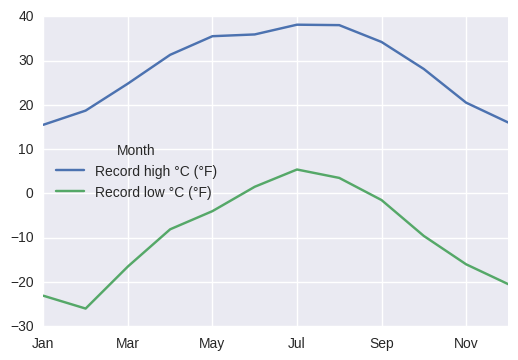

In [97]:
%matplotlib inline
x.iloc[:-1].plot()

# Exercises
THe referenced datasets are available at www.gagolewski.com/resources



1. Consider the `nasaweather_glaciers` data frame.
All glaciers are assigned 11/12-character unique identifiers.
The ID number is assigned to the glacier as defined by the WGMS
convention that forms the glacier ID number by combining the 
following five elements. Extract all of them and store them as independent
columns in the data frame.

    * 2-character political unit
    * 1-digit continent code
    * 4-character drainage code
    * 2-digit free position code
    * 2-3-digit local glacier code

2. Consider the `nycflights13_weather` data frame.
Create the `time_hour` column (ignore the existing one) of type date-time
based on `year`, `month`, `day`, and `hour`. Note that
Eastern Standard Time (EST) is 5 hours behind UTC
and that Eastern Daylight Time (EDT) is used in the summer.

3. Take the above data frame. Convert the `time_hour`
column to plain text. Use the ISO 8601 `date-T-time-timezoneshift` format
like `2017-01-17T13:29:24+00:00`.

5. Web-scape the HTML tables
`index_src_base_R-0.html.txt`, `index_src_base_R-1.html.txt`,
`index_src_base_R-2.html.txt`, `index_src_base_R-3.html.txt`.
Merge them to a single data frame. Convert the *Last modified* column
to a date-time object. Covert the *Size* column to numeric.

6. Extract all e-mail addresses from http://dirk.eddelbuettel.com/cranberries/2016/10/01/

7. Generate a list of cities based on https://en.wikipedia.org/wiki/List_of_cities_by_latitude; web-crawl on each city's page, extract a nice pandas data-frame representing climate data; for each city, generate a separate .csv file (this should give you ca. 800-900 csv files)

# Cython

http://cython.org/

In [98]:
%load_ext Cython

In [99]:
def pi1(n):
    s = 1.0 # == pil(0)
    a = 1.0
    b = 1.0
    for i in range(1, n+1):
        a = -a
        b += 2.0
        s += a/b
    return 4.0*s

pi1(10000000)

3.1415927535897814

In [100]:
import numpy
def pi2(n):
    s = 1.0/(np.arange(0, n+1)*2.0 + 1.0)
    s[1::2] = -s[1::2]
    return 4.0*np.sum(s)
pi2(10000000)

3.1415927535897881

In [101]:
%timeit pi1(1000000)
%timeit pi2(1000000)

10 loops, best of 3: 79.6 ms per loop
100 loops, best of 3: 5.57 ms per loop


In [102]:
%%cython -a
def pi3(n):
    s = 1.0 # == pil(0)
    a = 1.0
    b = 1.0
    for i in range(1, n+1):
        a = -a
        b += 2.0
        s += a/b
    return 4.0*s

pi3(10000000)

In [103]:
pi3(10000000)

3.1415927535897814

In [104]:
%timeit pi1(1000000)
%timeit pi2(1000000)
%timeit pi3(1000000)

10 loops, best of 3: 79.6 ms per loop
100 loops, best of 3: 5.59 ms per loop
100 loops, best of 3: 14.2 ms per loop


In [105]:
%%cython -a
cpdef double pi4(int n):                           ### cpdef is cython definition
    cdef double s = 1.0 # == pil(0)
    cdef double a = 1.0
    cdef double b = 1.0
    cdef int i
    for i in range(1, n+1):
        a = -a
        b += 2.0
        s += a/b
    return 4.0*s

pi4(10000000)

In [106]:
%timeit pi1(1000000)
%timeit pi2(1000000)
%timeit pi3(1000000)
%timeit pi4(1000000)

10 loops, best of 3: 79.8 ms per loop
100 loops, best of 3: 5.58 ms per loop
100 loops, best of 3: 14.2 ms per loop
1000 loops, best of 3: 1.22 ms per loop


In [107]:
np.random.seed(123)
x = np.random.rand(10000)

def quadratic_mean1(x):
    return np.sqrt(np.mean(x**2))
quadratic_mean1(x)

0.57561950831587028

In [108]:
%%cython -a
import numpy as np
cimport numpy as np

cpdef double quadratic_mean2(np.ndarray[np.double_t] x):
    #... len(x)
    # ... x[i] 
    cdef double sum1 = 0
    cdef int i
    cdef int k = len(x)
    for i in range(k):
        sum1 += x[i]**2
    return (sum1/k)**0.5



In [109]:
quadratic_mean2(x)

0.5756195083158706

In [110]:
% timeit quadratic_mean1(x)
% timeit quadratic_mean2(x)

The slowest run took 5.80 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 15 µs per loop
100000 loops, best of 3: 12.4 µs per loop


In [111]:
%%cython -a
import numpy as np
cimport numpy as np
cimport cython


@cython.boundscheck(False)
@cython.wraparound(False)
@cython.nonecheck(False)
cpdef double quadratic_mean3(np.ndarray[np.double_t] x):
    #... len(x)
    # ... x[i] 
    cdef double s = 0.0
    cdef unsigned int i, n = len(x)
    for i in range(n):
        s += x[i]**2
    return (s/n)**0.5    
    

In [112]:
% timeit quadratic_mean1(x)
% timeit quadratic_mean2(x)
% timeit quadratic_mean3(x)

The slowest run took 5.11 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 14.9 µs per loop
100000 loops, best of 3: 12.4 µs per loop
100000 loops, best of 3: 13.1 µs per loop


In [113]:
# np.ndarray[np.double_t, ndim = 2] A
# A.shape[0]
# A.shape[1]
# A[i, j]

# Exercises



1. Write a function that determines whether a given numeric list
is a palindrome.

2. Write a function that reverses the order of elements in a given numeric list.


28. Write a function that determines if all elements in a given logical
list are equal to `True`.

29. Write a function that determines if any element in a given logical
list is equal to `True`.

30. Write a function that counts the number of elements equal to `True`
in a given logical list.

24. Write a function that computes the cumulative sums of consecutive elements
in a given numeric `x`, i.e., a vector `r` with $r_i = \sum_{j=1}^i x_j$.

25. Write a funciton to compute the iterated (adjacent)
difference between consecutive elements
in a given numeric list `x`, i.e., a vector `r` with $r_i = x_{i+1}-x_i$.

23. Write a function that adds the corresponding items
in two numeric lists (elementwise), i.e., for given `x`, `y` return
`r` such that $r_i=x_i+y_i$. If vectors are of unequal lenghts,
the shorter one should be recycled, e.g.,
`[1,2,3,4,5,6]+[7,8]==[1,2,3,4,5,6]+[7,8,7,8,7,8]`.

26. Write a function that determines if a given list is sorted non-decreasingly.


2. Write a function which checks if a given natural number
is prime.

3. Write a function that counts the number of primes in the set 
$\{a,a+1,\dots,b\}$, for given $a<b$. Calling the function from the above
exercise does not lead to a time-optimal solution.
Hint: implement the Eratosthenes sieve.

4. Write a function that determines the least and the greatest element
in a given numeric list. Only one `for` loop is allowed.

4. Write a function that determines the indexes (positions)
of the least and the greatest element in a given numeric list.

5. Write a function which finds the 3rd least element in a given numeric
list, e.g., given `[3.0,5.0,2.0,4.0,1.0,6.0]`, the result should be equal to `4.0`.
Only a single `for` loop is allowed.

6. Write a function which finds the $k$ (given) least elements in some
on-line data stream (it can be based on a list, but you are allowed
to inspect each its element only once). 


7. Let `t` be an integer list with elements from 0 to $k-1$ for some $k$
(if your language - e.g., R - supports $1$-based indexing, assume that the elements
are from 1 to $k$).
Write a function that determines the mode, i.e, the most frequently occurring
value in `t`. If a mode is not-unique, return a random one.
Hint: use an auxiliary list of length $k$ to count the number of occurrences
of each element.

8. Let `t` and $k$ be as above. Implement the bucket sort algorithm.
Hint: the same as above.


14. Let `x` - numeric vector, `t` - an integer list with elements from 0 to $k-1$ for some $k$.
Return a vector of length $k$ which gives arithmetic means of observations in `x` grouped by 
corresponding values in `t` (something like SELECT t, MEAN(x) GROUP BY t).

15. The same, but compute the group medians.


9. Write a function to determine the mode in a sequence of arbitrary
(assume that they are immutable/hashable) objects. Hint: use a dictionary.


27. Write a function that determines if all elements in a given list are unique.
Use a dictionary.



10. Let $w(x)=w_0+w_1 x+\dots+w_n x^n$ and $v(x)=v_0+v_1 x+v_m x^m$ be two polynomials
of degrees $n$ and $m$, respectively.
Write a function takes takes two lists of coefficients, one of length $n+1$ and the
other of length $m+1$, representing two polynomials $w$ and $v$. 
Return a list of coefficients that represent the
polynomial $u(x)=w(x)v(x)$.



12. Implement the selection sort algorithm.

13. Implement the insertion sort algorithm.


14. Let `x` be a non-decreasingly sorted integer list.
Write a function that verifies whether a given `v` is in `x`.
Implement an algorithm that has a logarithmic time complexity.



15. Write a function that determines if all elements in a given sorted
list are unique.

11. Let `x` and `y` be two non-decreasingly sorted integer lists.
Write a function that returns their non-decreasingly sorted concatenation,
e.g., if `x=[1,4,5]` and `y=[0,2,3,6]`, then the expected output is `[0,1,2,3,4,5,6]`.
Implement an algorithm that has linear time complexity.

12. Let `x` and `y` be two (strictly) increasingly sorted integer lists,
representing two subsets of $\mathbb{Z}$.
Write a function that determines their union.

13. As above, but now implement the set intersection.

15. Implement the merge sort algorithm.

16. Write a function that rearranges the elements in a numeric list in such a way
that the elements less than or equal to a given `v` are followed by the elements
greater than `v`.

17. Implement the quick sort algorithm (with random pivoting).

18. Implement a hybrid quick sort algorithm:
in a recursive function call, if a subsequence of length ≤ 20 is to be ordered, 
then the insertion sort algorithm is used instead of the plain quick sort scheme.
Note: hybrid quick sort tends to be faster than its plain version.

19. Write a function that randomly rearranges the elements in a given
numeric list (generates its random permutation).
Implement the Knuth-Fisher-Yates shuffle. 

20. Implement the quick-select algorithm for finding the $k$-th smallest
value in an unsorted list (for a given $k$).

21. Implement a partial quick sort  algorithm that guarantes
that the $k$ smallest values are in order  (for a given $k$).

22. Implement an algorithm that determines the permutation of elements
that generates a non-decreasingly ordered version of a given list `x`
(compare `argsort()` in NumPy or `order()` in R),
i.e., an integer list $[i_1,i_2,\dots,i_n]$ such that $x_{i_1}\le x_{i_2}\le\dots\le x_{i_n}$.
The routine should be based on a stable sorting algorithm,
i.e., if $x_{i_u}=x_{i_v}$ for some $u<v$, then necessarily $i_u<i_v$
(the relative ordering of elements with the same key should be preserved).

23. Given two integer lists of arbitrary lenghts, determine if the
first one is lexicographically less-than-or-equal-to the second one.

24. Write a function that ranks each element in a given numeric vector.
For example, given (1, 3, 5, 2, 4, 3), we should get
(1.0, 3.5, 6.0, 2.0, 5.0, 3.5).

25. Four men want to cross a bridge. But at most 2 people may cross it at a time.
For man A it takes 10 minutes to cross, for B -- 5 minutes,
C -- 2 minutes, and D  -- 1 minute. If two people cross the bridge together,
they must walk at the pace of the slower one.
Also, it is night. Each trip requires a flashlight.  There
is only one flashlight. The men are not allowed to toss the light over
the river. How fast can you get all 4 men over the bridge?
Examine all the 108 possible solutions and determine the optimal one
(the optimal time is $<19$).